In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import  os

## EDA Part

In [8]:
os.chdir(r'C:\Users\daiya\OneDrive\Desktop\Sale Analysis\Online_Sales')

In [11]:
retail_df = pd.read_csv('Online Retail.csv',encoding='ISO-8859-1')

In [13]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


In [14]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are some missing value for customerID

In [15]:
# get the unique value of  each columns
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [16]:
retail_df.shape

(541909, 8)

### Explanation of columns:
**InvoiceNo**: Invoice number. Uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
**StockCode**: Product (item) code. <br>
**Description**: Product (item) name. <br>
**Quantity**: The quantities of each product (item) per transaction. <br>
**InvoiceDate**: Invoice Date and time. <br>
**UnitPrice**: Unit price. <br>
**CustomerID**: Customer number. <br>
**Country**: Country name. <br>

In [17]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We have negative value for the quantity and unitprice column which we should be careful, here we know it represents that the item is returned or cancelled

In [18]:
# let's get the cancelled transactions first, we know it begins with c, so we can do like this

#get canceled transactions
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010/12/1 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010/12/1 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010/12/1 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548.0,United Kingdom


   ## Question 1: What is the cancel rate?

In [24]:
# here we can see the cancel rate is high and we should think about why later
print('Cancel Rate is:', round(cancelled_orders.shape[0]/retail_df['InvoiceNo'].nunique()*100,2),'%')

Cancel Rate is: 35.86 %


  ## Question 2: How many items do customers buy per transaction?

In [25]:
temp_df =retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()

transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [29]:
average_item =transaction_df.groupby(['CustomerID'],as_index=False)['Number of products'].mean()

In [30]:
average_item 

,CustomerID,Number of products
0,12346.0,1.000000
1,12347.0,26.000000
2,12348.0,7.750000
3,12349.0,73.000000
4,12350.0,17.000000
...,...,...
4367,18280.0,10.000000
4368,18281.0,7.000000
4369,18282.0,4.333333
4370,18283.0,47.250000


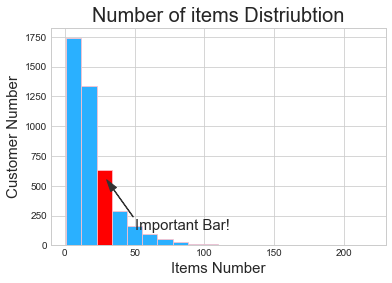

In [69]:
plt.style.use('seaborn-whitegrid')
n, bins, patches  = plt.hist(average_item['Number of products'], 
         bins = 20, facecolor = '#2ab0ff', 
         edgecolor='pink', linewidth=0.8)
plt.title('Number of items Distriubtion',fontsize=20) 
plt.xlabel('Items Number', fontsize=15) 
plt.ylabel('Customer Number', fontsize=15) 
# Make one stand out
patches[2].set_fc('red') # Set color
patches[2].set_alpha(1) # Set opacity
# Add annotation
plt.annotate('Important Bar!', xy=(30, 550), 
             xytext=(50, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
plt.show()

# the important bar is only for fun
# we can see most customers buy few stuffs for one transaction

### Question 3: What's the total revenue per country?

In [70]:
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [71]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34


In [73]:
country_group = retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

In [83]:
country_group

# UK is the largest market of our products

,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05
Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05
Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04
Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


In [84]:
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()/retail_df['CustomerID'].nunique()

0.903476669716377

From here we konw the UK is not only the largest revenues and market place, but also it holds more than 90% of customers

### Question 4: Seeing that UK is the most important market, we want to know what is the most sold product in UK?

In [88]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1145,22197,52928
2995,84077,48326
3511,85099B,43167
3532,85123A,36706
3302,84879,33519
1528,22616,25307
452,21212,24702
1126,22178,23242
83,17003,22801
964,21977,20288


These are the most important items for us, and we can pay attention on these products more.

## Then we go to the part to analyze the customer behaviors, but firstly we should have a understanding of RFM

### What is RFM Analysis<br>

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

**Recency (R) as days since last purchase<br>
Frequency (F) as total number of transactions<br>
Monetary (M) as total money spent**

Once we have RFM values from the purchase history, we assign a score from one to five to recency, frequency and monetary values individually for each customer. Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.<br>
Remember, RFM values and RFM scores are different. Value is the actual value of R/F/M for that customer, while Score is a number from 1-5 based on the value.

The RFM score Range thresholds are based on the nature of business. You’d define ranges for frequency and monetary values like this too.

In [173]:
# Firstly we remove cancelled order and restrict customers in UK

In [180]:
retail_df = pd.read_csv('Online Retail.csv',encoding='ISO-8859-1')

In [181]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']

In [182]:
retail_uk = retail_uk[retail_uk['Quantity']>0]

In [183]:
# remove canceled orders
#remove rows where customerID are NA
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True)

In [184]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]

In [185]:
retail_uk.shape

(354345, 8)

### Calculate Recency

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [186]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

# we use this date as reference

'2011/9/9 9:52'

In [187]:
import time, warnings
import datetime as dt
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [188]:
#create a new column called date which contains the date of invoice only
retail_uk['date'] = pd.to_datetime(retail_uk['InvoiceDate']).dt.date

In [189]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [190]:
#group by customers and check last date of purshace
recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [191]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [192]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [193]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [194]:
# drop duplicates
retail_uk_copy = retail_uk
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


### Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

In [132]:
#create column total cost
retail_uk['TotalCost'] = retail_uk['Quantity'] * retail_uk['UnitPrice']

In [146]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


### Create RFM Table

In [142]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


In [147]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


### Bonus topic-The validation of Pareto Principle

Pareto’s rule says 80% of the results come from 20% of the causes.

Similarly, 20% customers contribute to 80% of your total revenue. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [149]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  920023.17


In [151]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,2.0
12747.0,2,11,689.49,186.0
12748.0,0,210,3841.31,36.0
12749.0,3,5,98.35,1179.0
12820.0,3,4,58.20,1712.5


In [152]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,1.0
12346.0,325,1,77183.60,2.0
18102.0,0,60,42053.60,3.0
15098.0,182,3,39916.50,4.0
17949.0,1,45,29999.69,5.0
...,...,...,...,...
15645.0,18,1,0.42,3917.5
15503.0,362,1,0.42,3917.5
17914.0,3,1,0.39,3919.5


In [154]:
#get top 20% of the customers
top_20_cutoff = 3921 *20 /100
top_20_cutoff

784.2

In [155]:
#sum the monetary values over the customer with rank <=784
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 784]['Monetary'].sum()
revenueByTop20

1008395.66

In [160]:
print("Difference of real and ideal value:",round((1008395.66 - 920023.17)/920023*100,2),'%')
# Not that bad, it is close, we should pay attention on these group of people

Difference of real and ideal value: 9.61 %


### After we calculate the RFM value, we should calculate RFM score

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [164]:
rfm_df

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,2.0
12747.0,2,11,689.49,186.0
12748.0,0,210,3841.31,36.0
12749.0,3,5,98.35,1179.0
12820.0,3,4,58.20,1712.5
...,...,...,...,...
18280.0,277,1,23.70,2634.0
18281.0,180,1,5.04,3678.0
18282.0,7,2,38.25,2146.5


In [165]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,17.0,1.0,17.7,981.0
0.50,50.0,2.0,45.4,1961.0
0.75,142.0,5.0,124.5,2924.0


In [167]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.50000000000001},
 'Rank': {0.25: 981.0, 0.5: 1961.0, 0.75: 2924.0}}

In [168]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [169]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [195]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4
12747.0,2,11,689.49,186.0,4,4,4
12748.0,0,210,3841.31,36.0,4,4,4
12749.0,3,5,98.35,1179.0,4,3,3
12820.0,3,4,58.20,1712.5,4,3,3


In [197]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()
# get the RFM score

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114
12747.0,2,11,689.49,186.0,4,4,4,444
12748.0,0,210,3841.31,36.0,4,4,4,444
12749.0,3,5,98.35,1179.0,4,3,3,433
12820.0,3,4,58.20,1712.5,4,3,3,433


In [198]:
# Then based on RFM score, we can get the most important customers for us.

In [201]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
18102.0,0,60,42053.60,3.0,4,4,4,444
17949.0,1,45,29999.69,5.0,4,4,4,444
17450.0,8,46,26768.97,6.0,4,4,4,444
16013.0,3,47,17895.28,8.0,4,4,4,444
16333.0,7,22,14418.96,9.0,4,4,4,444
...,...,...,...,...,...,...,...,...
15214.0,1,8,127.36,961.0,4,4,4,444
16929.0,3,7,126.78,967.0,4,4,4,444
15023.0,3,11,126.46,969.0,4,4,4,444


In [202]:
# The proportion for customers we have in each segment

In [203]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


So based on RFM score, we can deploy different methods to make more profit.
<br>
<br>
For example:
<br>
Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".
<br>
At Risk: Send them personalized emails to encourage them to shop.

## Applying K-means clustering on RFM variables

K-means has been widely used for Market Segmentation and we can go for more advanced algorithm after it

In [206]:
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore','Rank'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [208]:
rfm_data.corr()
# there is no strong correlation between three scores

,Recency,Frequency,Monetary
Recency,1.000000,-0.273779,-0.030123
Frequency,-0.273779,1.000000,0.163225
Monetary,-0.030123,0.163225,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203ED381FC8>,
      dtype=object)

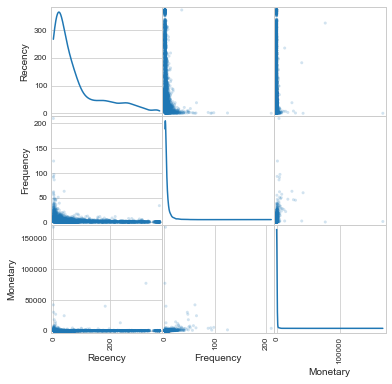

In [211]:
from pandas.plotting import scatter_matrix
scatter_matrix(rfm_data, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [212]:
# We can find data is not normalized, we can do the normalization for it

In [213]:
#log transformation
rfm_r_log = np.log(rfm_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [214]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020381DCF9C8>,
      dtype=object)

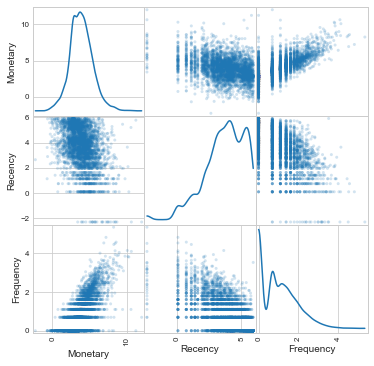

In [215]:
scatter_matrix(log_data, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [217]:
log_data.corr()

# Now monetary and frequency is strongly correlated

,Monetary,Recency,Frequency
Monetary,1.000000,-0.368472,0.716935
Recency,-0.368472,1.000000,-0.573982
Frequency,0.716935,-0.573982,1.000000


In [220]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score


matrix = log_data.as_matrix()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

D:\PathonSoftware\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


For n_clusters = 2 The average silhouette_score is : 0.3893778047545115
For n_clusters = 3 The average silhouette_score is : 0.30205615415685294
For n_clusters = 4 The average silhouette_score is : 0.3121097689908858
For n_clusters = 5 The average silhouette_score is : 0.2915534655444378
For n_clusters = 6 The average silhouette_score is : 0.2971152471372098
For n_clusters = 7 The average silhouette_score is : 0.2939986983351904
For n_clusters = 8 The average silhouette_score is : 0.28879553450120643
For n_clusters = 9 The average silhouette_score is : 0.29061584209290436


In [221]:
# here we can see the cluster 2 has the highest sihouette score

In [223]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.389


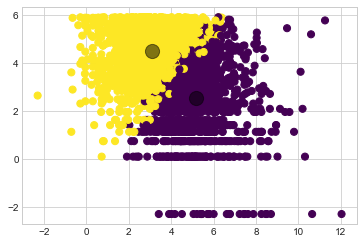

In [227]:
# Visualize Clusters
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [228]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

,1,0
NumberCustomers,2365,1556


So till now, we have explore our dataset, and calculate the RFM score for each customer, and based on RFM values, we apply the K-means method to cluster the customer. Based on the clustered group, we can make different decision towards diferent group of customers and even predict a new customers group.